In [2]:
import pandas as pd
import numpy as np
import os
import sys
import json
import requests
import gc
from tqdm import tqdm

from google.cloud import bigquery
from google.cloud.bigquery import job
from datetime import date, timedelta

PROJCECT = 'ballosodeuk'
bq = bigquery.Client(project=PROJCECT)

#  클라이언트 설정



In [7]:
query = """select * from ballosodeuk.ynam.rfm_shopby_history_array_table,unnest(score_history) as s
where s.snapshot_dt = date("2025-01-08")"""

df = bq.query(query).to_dataframe()
df

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


,user_id,gender,age_group,join_group,platform,terms_agree_yn,first_order_dt,score_history,category_history,snapshot_dt,...,r_data,f_data,m_data,refund_rate,survival_prob,predicted_survival_time,total_accumulate_cash,total_accumulate_shoji,current_cash,current_shoji
0,12979720-93b0-4cf1-a0ba-50a99d047172,MALE,30,23-11,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,2266,0.0,0.94,13.0,45797,3048,40863,463
1,ee8ca133-05b1-4d77-81b9-c7f99ccabe6a,FEMALE,30,23-03,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '생...",2025-01-08,...,0,1,1696,0.0,0.94,13.0,71412,2701,23346,321
2,28d3c4a0-cbef-421f-b9e3-d56db887b23f,FEMALE,50,23-07,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,3534,0.0,0.94,13.0,62614,1551,42307,311
3,2aecc40c-fef5-47fc-bb76-8c51a6165104,FEMALE,40,23-06,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,0,0.0,0.94,13.0,10207,11123,30,586
4,6c0c9ddc-39e1-4dce-856f-5815f45720de,MALE,70,23-10,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,4631,0.0,0.94,13.0,90604,2780,58258,1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,1c178aaa-160a-4def-8b04-e46e530d6aae,FEMALE,50,23-05,Android,true,2024-12-17,"[{'snapshot_dt': 2025-01-07, 'total_score': 4....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '식...",2025-01-08,...,4,2,1824,0.0,0.80,7.0,82365,41443,10845,2003
9283,def00002-3963-42b2-b5f0-11009c77b38f,MALE,30,23-06,Android,false,2024-11-20,"[{'snapshot_dt': 2025-01-07, 'total_score': 4....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '디...",2025-01-08,...,7,2,2675,0.0,0.80,20.0,1353247,14359,391,492
9284,fe0c5471-dfe8-4328-96ce-ec444f38556e,FEMALE,60,23-04,Android,true,2024-12-15,"[{'snapshot_dt': 2025-01-07, 'total_score': 3....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '식...",2025-01-08,...,5,2,1470,0.0,0.78,6.0,85963,9238,1351,238
9285,2f8920fd-e013-4b3e-bd99-19cdcbcbe2a6,FEMALE,50,23-11,Android,true,2024-12-01,"[{'snapshot_dt': 2025-01-07, 'total_score': 3....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '식...",2025-01-08,...,7,2,841,0.0,0.75,13.0,81450,7813,51462,1913


In [11]:
df.head()

,user_id,gender,age_group,join_group,platform,terms_agree_yn,first_order_dt,score_history,category_history,snapshot_dt,...,r_data,f_data,m_data,refund_rate,survival_prob,predicted_survival_time,total_accumulate_cash,total_accumulate_shoji,current_cash,current_shoji
0,12979720-93b0-4cf1-a0ba-50a99d047172,MALE,30,23-11,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,2266,0.0,0.94,13.0,45797,3048,40863,463
1,ee8ca133-05b1-4d77-81b9-c7f99ccabe6a,FEMALE,30,23-03,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '생...",2025-01-08,...,0,1,1696,0.0,0.94,13.0,71412,2701,23346,321
2,28d3c4a0-cbef-421f-b9e3-d56db887b23f,FEMALE,50,23-07,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,3534,0.0,0.94,13.0,62614,1551,42307,311
3,2aecc40c-fef5-47fc-bb76-8c51a6165104,FEMALE,40,23-06,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,0,0.0,0.94,13.0,10207,11123,30,586
4,6c0c9ddc-39e1-4dce-856f-5815f45720de,MALE,70,23-10,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,0,1,4631,0.0,0.94,13.0,90604,2780,58258,1155


In [17]:
# df_processed['ltv'] =  calculate_ltv(df_processed)
df_processed

,user_id,gender,age_group,join_group,platform,terms_agree_yn,first_order_dt,score_history,category_history,snapshot_dt,...,f_data,m_data,refund_rate,survival_prob,predicted_survival_time,total_accumulate_cash,total_accumulate_shoji,current_cash,current_shoji,ltv
0,12979720-93b0-4cf1-a0ba-50a99d047172,MALE,30,23-11,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,1,2266,0.0,0.94,13.0,45797,3048,40863,463,29458.0
1,ee8ca133-05b1-4d77-81b9-c7f99ccabe6a,FEMALE,30,23-03,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '생...",2025-01-08,...,1,1696,0.0,0.94,13.0,71412,2701,23346,321,22048.0
2,28d3c4a0-cbef-421f-b9e3-d56db887b23f,FEMALE,50,23-07,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,1,3534,0.0,0.94,13.0,62614,1551,42307,311,45942.0
3,2aecc40c-fef5-47fc-bb76-8c51a6165104,FEMALE,40,23-06,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,1,0,0.0,0.94,13.0,10207,11123,30,586,0.0
4,6c0c9ddc-39e1-4dce-856f-5815f45720de,MALE,70,23-10,Android,true,2025-01-07,"[{'snapshot_dt': 2025-01-08, 'total_score': 3....","[{'snapshot_dt': 2025-01-08, 'ranking_1_1': '식...",2025-01-08,...,1,4631,0.0,0.94,13.0,90604,2780,58258,1155,60203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,1c178aaa-160a-4def-8b04-e46e530d6aae,FEMALE,50,23-05,Android,true,2024-12-17,"[{'snapshot_dt': 2025-01-07, 'total_score': 4....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '식...",2025-01-08,...,2,1824,0.0,0.80,7.0,82365,41443,10845,2003,12768.0
9283,def00002-3963-42b2-b5f0-11009c77b38f,MALE,30,23-06,Android,false,2024-11-20,"[{'snapshot_dt': 2025-01-07, 'total_score': 4....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '디...",2025-01-08,...,2,2675,0.0,0.80,20.0,1353247,14359,391,492,53500.0
9284,fe0c5471-dfe8-4328-96ce-ec444f38556e,FEMALE,60,23-04,Android,true,2024-12-15,"[{'snapshot_dt': 2025-01-07, 'total_score': 3....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '식...",2025-01-08,...,2,1470,0.0,0.78,6.0,85963,9238,1351,238,8820.0
9285,2f8920fd-e013-4b3e-bd99-19cdcbcbe2a6,FEMALE,50,23-11,Android,true,2024-12-01,"[{'snapshot_dt': 2025-01-07, 'total_score': 3....","[{'snapshot_dt': 2025-01-07, 'ranking_1_1': '식...",2025-01-08,...,2,841,0.0,0.75,13.0,81450,7813,51462,1913,10933.0


In [33]:
df[['user_id','cycle_length','r_score','f_score','m_score']].query("cycle_length=='장기' ")

,user_id,cycle_length,r_score,f_score,m_score
1575,0fe97b76-eea5-4bbb-af1c-ccb8df95bc09,장기,4,5,1
1577,1e61d309-29b0-4993-8de9-8ba73c77ceda,장기,4,5,3
2743,8bbd7754-905f-4109-92ed-d02cb814076e,장기,4,5,2
2744,c8df200d-933a-438b-b33c-2775ff3002ce,장기,4,5,5
2746,efcca390-85eb-4cf3-8f34-006dfccf1a7b,장기,5,5,2
...,...,...,...,...,...
9276,b877bc01-6f04-4d6e-8706-55221757f2ca,장기,4,5,4
9277,62f9c95b-0da6-4d69-ade0-67ca3302245f,장기,3,5,5
9278,110a144f-465f-4e35-a0cb-7102bab06099,장기,3,5,4
9279,6e11fb5e-0745-423a-9924-93fac0801692,장기,3,4,5


In [29]:
df.groupby('cycle_length').agg({
    'predicted_survival_time': 'mean',
    'r_score': 'mean',
    'f_score': 'mean',
    'm_score': 'mean'
})

,predicted_survival_time,r_score,f_score,m_score
cycle_length,,,,
단기,3.633850,3.265487,4.836283,4.314159
신규,3.670917,2.889219,2.442272,2.636776
장기,45.074627,4.0199,4.671642,3.666667
중기,14.533333,3.457971,4.82029,4.194203
초단기,0.160668,3.226221,4.681234,4.060411


- 구매주기 가중치 (cycle_weight)
    - 구매주기가 길수록 가중치가 감소하도록 설계
    - 제곱근을 사용하여 극단적인 편향 완화
- 구매 품질 (monetary_quality)
    - 단순 구매금액이 아닌 구매건당 평균 금액 사용
    - 고객의 질적 가치 반영
- 구매빈도 보정 (frequency_factor)
    - 로그 스케일을 사용하여 구매빈도의 영향력 조정
    - 극단값의 영향 완화
- 생존기간 보정 (adj_survival_time)
    - 구매주기로 가중치를 부여한 생존기간 사용
    - 짧은 구매주기 고객의 과소평가 방지

- 짧은 구매주기 + 높은 구매빈도 고객의 가치를 적절히 반영
- 긴 구매주기 + 낮은 구매빈도 고객의 과대평가 방지
- 구매의 질적 측면까지 고려한 더 정확한 가치 평가 가능


Weight Optimization Results:
      Feature  Original  Optimized
0     Recency      0.30   0.410851
1   Frequency      0.25   0.024510
2    Monetary      0.25   0.454547
3        Term      0.10   0.066996
4   Term Diff      0.05   0.025730
5  Volatility      0.05   0.017366

Correlation with LTV:
Train - Original: 0.420, Optimized: 0.469
Test  - Original: 0.389, Optimized: 0.451


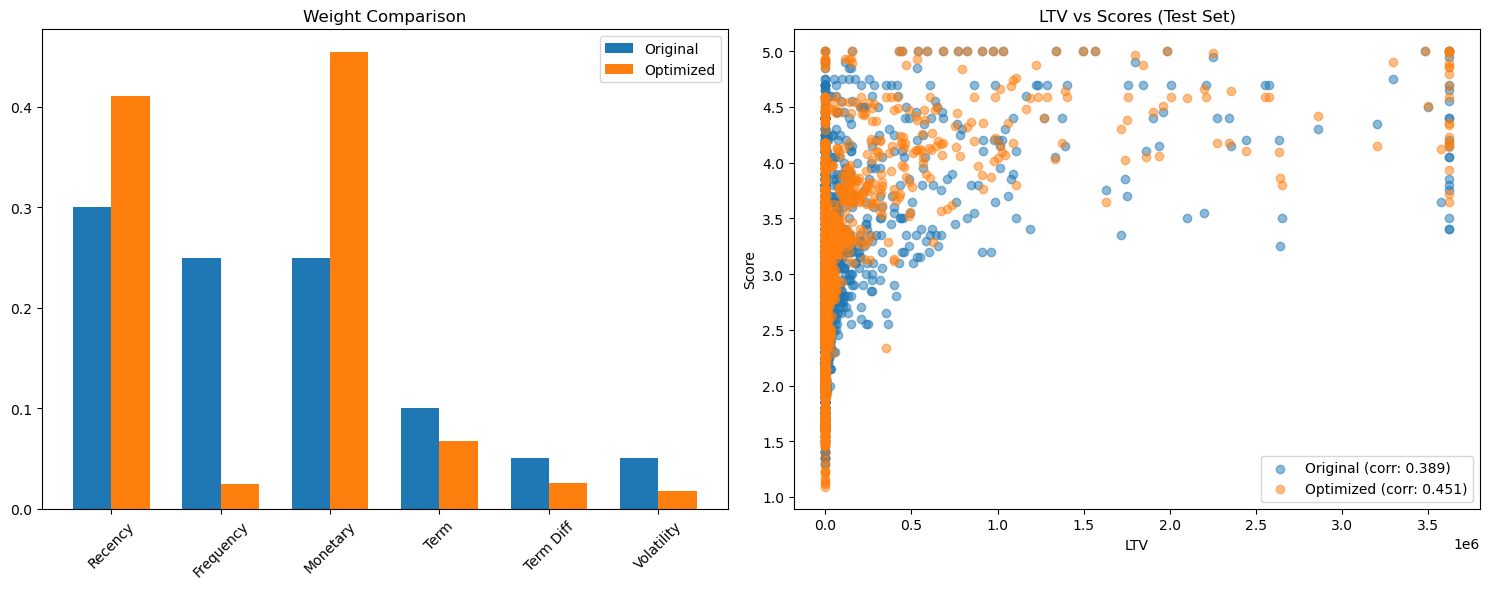

In [41]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    """
    데이터 전처리: 문자열을 숫자로 변환
    """
    numeric_columns = [
        'cycle_length', 'm_data', 'predicted_survival_time',
        'r_score', 'f_score', 'm_score', 
        'term_score', 'term_diff_score', 'volatility_score'
    ]
    
    df_processed = df.copy()
    
    for col in numeric_columns:
        if col in df.columns:
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
            # 결측치는 0으로 대체
            df_processed[col] = df_processed[col].fillna(0)
    
    return df_processed

def calculate_adjusted_ltv(df):
    # cycle_weight에서 0으로 나누는 문제 가능성
    cycle_weight = 1 / np.sqrt(df['cycle_length'].replace(0, 0.1))  # 0을 0.1로 대체
    
    # monetary_quality 계산 시 0으로 나누는 문제 가능성
    monetary_quality = np.where(df['f_data'] > 0,
                              df['m_data'] / df['f_data'],
                              df['m_data'])  # f_data가 0인 경우 m_data 사용
    
    frequency_factor = np.log1p(df['f_data'])
    
    # 극단값 처리
    monetary_quality_norm = monetary_quality / np.median(monetary_quality)  # mean 대신 median 사용
    
    avg_purchase_per_cycle = df['m_data'] / df['cycle_length'].replace(0, 1)
    adj_survival_time = df['predicted_survival_time'] * cycle_weight
    
    adjusted_ltv = (avg_purchase_per_cycle * adj_survival_time * 
                   (1 + frequency_factor) * monetary_quality_norm)
    
    # 극단값 처리
    adjusted_ltv = np.clip(adjusted_ltv, 0, np.percentile(adjusted_ltv, 99))
    
    return adjusted_ltv

def calculate_weighted_score(df, weights):
    """
    주어진 가중치로 total_score 계산
    """
    return (df['r_score'] * weights[0] + 
            df['f_score'] * weights[1] + 
            df['m_score'] * weights[2] + 
            df['term_score'] * weights[3] + 
            df['term_diff_score'] * weights[4] + 
            df['volatility_score'] * weights[5])

def objective_function(weights, df):
    """
    LTV와의 상관관계를 최대화하는 목적함수에 페널티 추가
    """
    total_score = calculate_weighted_score(df, weights)
    adjusted_ltv = calculate_adjusted_ltv(df)
    
    # 스코어와 LTV를 정규화
    total_score_norm = (total_score - total_score.mean()) / total_score.std()
    ltv_norm = (adjusted_ltv - adjusted_ltv.mean()) / adjusted_ltv.std()
    
    # 상관관계 계산
    correlation = np.corrcoef(total_score_norm, ltv_norm)[0,1]
    
    # 가중치 분산에 대한 페널티 (너무 극단적인 가중치 방지)
    weight_variance_penalty = np.var(weights) * 0.1
    
    return -(correlation - weight_variance_penalty)  # 최대화를 위해 음수 반환

# 데이터 전처리
df_processed = preprocess_data(df)

# Train/Test 분할
X_train, X_test = train_test_split(df_processed, test_size=0.2, random_state=42)

# 최적화 설정
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 가중치 합 = 1
bounds = [(0, 1) for _ in range(6)]  # 각 가중치는 0~1 사이
initial_weights = [0.3, 0.25, 0.25, 0.1, 0.05, 0.05]

# 최적화 실행
result = minimize(objective_function, 
                 initial_weights,
                 args=(X_train,),
                 constraints=constraints,
                 bounds=bounds,
                 method='SLSQP')

# 결과 분석 및 시각화
def analyze_results(original_weights, optimized_weights, train_data, test_data):
    results = {}
    
    # Train set 성능
    train_original_score = calculate_weighted_score(train_data, original_weights)
    train_optimized_score = calculate_weighted_score(train_data, optimized_weights)
    train_ltv = calculate_adjusted_ltv(train_data)
    
    # Test set 성능
    test_original_score = calculate_weighted_score(test_data, original_weights)
    test_optimized_score = calculate_weighted_score(test_data, optimized_weights)
    test_ltv = calculate_adjusted_ltv(test_data)
    
    results['train'] = {
        'original_correlation': np.corrcoef(train_original_score, train_ltv)[0,1],
        'optimized_correlation': np.corrcoef(train_optimized_score, train_ltv)[0,1]
    }
    
    results['test'] = {
        'original_correlation': np.corrcoef(test_original_score, test_ltv)[0,1],
        'optimized_correlation': np.corrcoef(test_optimized_score, test_ltv)[0,1]
    }
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 가중치 비교
    labels = ['Recency', 'Frequency', 'Monetary', 'Term', 'Term Diff', 'Volatility']
    x = np.arange(len(labels))
    width = 0.35
    
    ax1.bar(x - width/2, original_weights, width, label='Original')
    ax1.bar(x + width/2, optimized_weights, width, label='Optimized')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45)
    ax1.legend()
    ax1.set_title('Weight Comparison')
    
    # LTV vs Score (Test set)
    ax2.scatter(test_ltv, test_original_score, alpha=0.5, 
               label=f"Original (corr: {results['test']['original_correlation']:.3f})")
    ax2.scatter(test_ltv, test_optimized_score, alpha=0.5, 
               label=f"Optimized (corr: {results['test']['optimized_correlation']:.3f})")
    ax2.set_xlabel('LTV')
    ax2.set_ylabel('Score')
    ax2.legend()
    ax2.set_title('LTV vs Scores (Test Set)')
    
    plt.tight_layout()
    return results

# 결과 분석 실행
results = analyze_results(initial_weights, result.x, X_train, X_test)

# 최적화된 가중치 출력
weight_comparison = pd.DataFrame({
    'Feature': ['Recency', 'Frequency', 'Monetary', 'Term', 'Term Diff', 'Volatility'],
    'Original': initial_weights,
    'Optimized': result.x
})

print("\nWeight Optimization Results:")
print(weight_comparison)
print("\nCorrelation with LTV:")
print(f"Train - Original: {results['train']['original_correlation']:.3f}, Optimized: {results['train']['optimized_correlation']:.3f}")
print(f"Test  - Original: {results['test']['original_correlation']:.3f}, Optimized: {results['test']['optimized_correlation']:.3f}")


Weight Optimization Results:

Original weights: {'R': '0.300', 'F': '0.250', 'M': '0.250', 'Term': '0.100', 'Term_diff': '0.050', 'Vol': '0.050'}
Optimized weights: {'R': '0.411', 'F': '0.024', 'M': '0.454', 'Term': '0.067', 'Term_diff': '0.026', 'Vol': '0.018'}

Correlation with LTV:
Train - Original: 0.420, Optimized: 0.469
Test  - Original: 0.389, Optimized: 0.451

Validation Results:
Original correlation 95% CI: [0.369, 0.405]
Optimized correlation 95% CI: [0.435, 0.466]
Improvement: 0.063


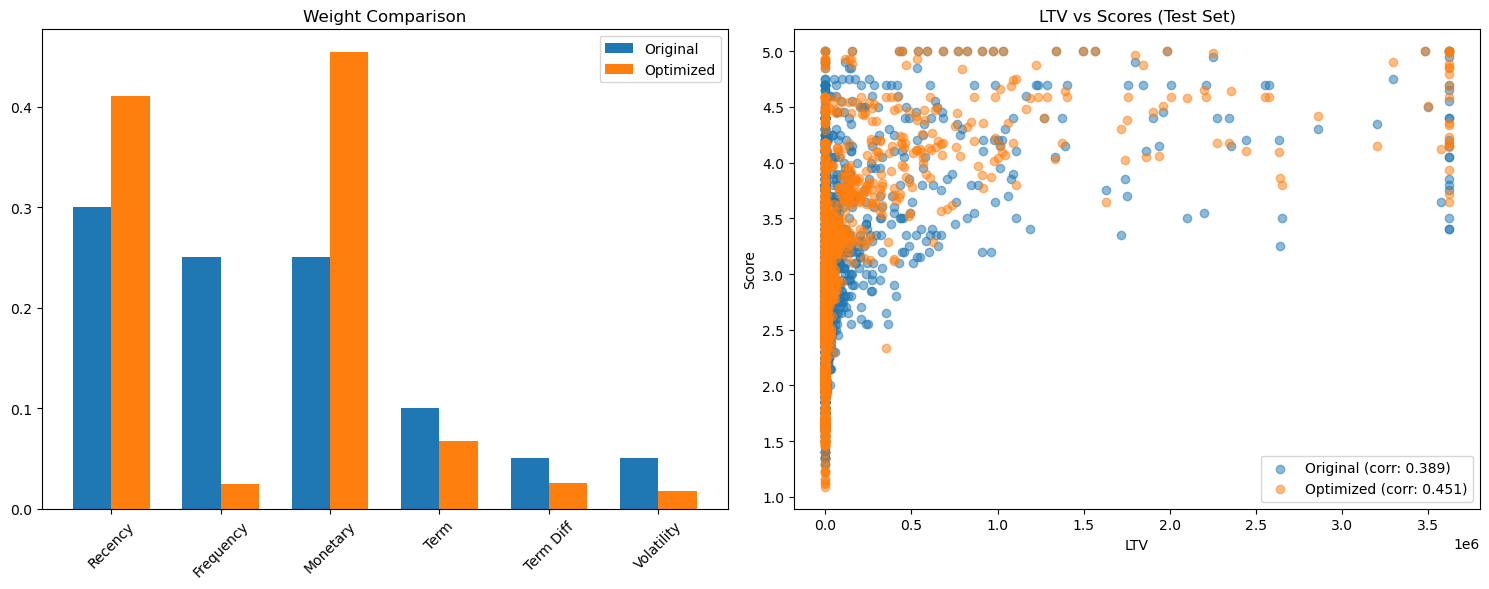

In [50]:
def validate_optimization(original_weights, optimized_weights, df):
    """
    최적화 결과의 통계적 유의성 검증 - 수정된 버전
    """
    original_score = calculate_weighted_score(df, original_weights)
    optimized_score = calculate_weighted_score(df, optimized_weights)
    ltv = calculate_adjusted_ltv(df)
    
    # 부트스트랩을 통한 상관계수의 신뢰구간 계산
    n_bootstrap = 1000
    original_corrs = []
    optimized_corrs = []
    n_samples = len(df)
    
    for _ in range(n_bootstrap):
        # 인덱스 대신 불리언 마스크 사용
        mask = np.random.choice([True, False], size=n_samples, p=[0.8, 0.2])
        
        # 마스크를 사용하여 데이터 샘플링
        boot_original = original_score[mask]
        boot_optimized = optimized_score[mask]
        boot_ltv = ltv[mask]
        
        # 상관계수 계산
        original_corrs.append(np.corrcoef(boot_original, boot_ltv)[0,1])
        optimized_corrs.append(np.corrcoef(boot_optimized, boot_ltv)[0,1])
    
    return {
        'original_ci': np.percentile(original_corrs, [2.5, 97.5]),
        'optimized_ci': np.percentile(optimized_corrs, [2.5, 97.5]),
        'improvement': np.mean(optimized_corrs) - np.mean(original_corrs)
    }

def analyze_results(original_weights, optimized_weights, train_data, test_data):
    """
    결과 분석 및 시각화 - 수정된 버전
    """
    results = {}
    
    # Train set 성능
    train_original_score = calculate_weighted_score(train_data, original_weights)
    train_optimized_score = calculate_weighted_score(train_data, optimized_weights)
    train_ltv = calculate_adjusted_ltv(train_data)
    
    # Test set 성능
    test_original_score = calculate_weighted_score(test_data, original_weights)
    test_optimized_score = calculate_weighted_score(test_data, optimized_weights)
    test_ltv = calculate_adjusted_ltv(test_data)
    
    results['train'] = {
        'original_correlation': np.corrcoef(train_original_score, train_ltv)[0,1],
        'optimized_correlation': np.corrcoef(train_optimized_score, train_ltv)[0,1]
    }
    
    results['test'] = {
        'original_correlation': np.corrcoef(test_original_score, test_ltv)[0,1],
        'optimized_correlation': np.corrcoef(test_optimized_score, test_ltv)[0,1]
    }
    
    # 시각화
    plt.figure(figsize=(15, 6))
    
    # 첫 번째 서브플롯: 가중치 비교
    plt.subplot(121)
    labels = ['Recency', 'Frequency', 'Monetary', 'Term', 'Term Diff', 'Volatility']
    x = np.arange(len(labels))
    width = 0.35
    
    plt.bar(x - width/2, original_weights, width, label='Original')
    plt.bar(x + width/2, optimized_weights, width, label='Optimized')
    plt.xticks(x, labels, rotation=45)
    plt.legend()
    plt.title('Weight Comparison')
    
    # 두 번째 서브플롯: LTV vs Score (Test set)
    plt.subplot(122)
    plt.scatter(test_ltv, test_original_score, alpha=0.5, 
               label=f"Original (corr: {results['test']['original_correlation']:.3f})")
    plt.scatter(test_ltv, test_optimized_score, alpha=0.5, 
               label=f"Optimized (corr: {results['test']['optimized_correlation']:.3f})")
    plt.xlabel('LTV')
    plt.ylabel('Score')
    plt.legend()
    plt.title('LTV vs Scores (Test Set)')
    
    plt.tight_layout()
    
    return results

# 최적화 과정
def optimize_multiple_starts(df, n_starts=10):
    """
    다양한 초기값으로 최적화 시도 - 수정된 버전
    """
    best_result = None
    best_score = float('-inf')
    
    for i in range(n_starts):
        # 랜덤 초기값 생성 (합이 1이 되도록)
        initial_weights = np.random.dirichlet(np.ones(6))
        
        result = minimize(objective_function, 
                        initial_weights,
                        args=(df,),
                        constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}),
                        bounds=[(0, 1) for _ in range(6)],
                        method='SLSQP',
                        options={'maxiter': 1000, 'ftol': 1e-8})
        
        if -result.fun > best_score:  # -result.fun because we minimized -correlation
            best_score = -result.fun
            best_result = result
    
    return best_result

# 결과 실행 및 출력
def run_optimization(df_processed):
    """
    전체 최적화 프로세스 실행
    """
    # Train/Test 분할
    X_train, X_test = train_test_split(df_processed, test_size=0.2, random_state=42)
    
    # 초기 가중치
    initial_weights = [0.3, 0.25, 0.25, 0.1, 0.05, 0.05]
    
    # 최적화 실행
    best_result = optimize_multiple_starts(X_train)
    
    # 결과 분석
    results = analyze_results(initial_weights, best_result.x, X_train, X_test)
    validation_results = validate_optimization(initial_weights, best_result.x, X_test)
    
    # 결과 출력
    print("\nWeight Optimization Results:")
    print("\nOriginal weights:", dict(zip(['R', 'F', 'M', 'Term', 'Term_diff', 'Vol'], 
                                        [f"{w:.3f}" for w in initial_weights])))
    print("Optimized weights:", dict(zip(['R', 'F', 'M', 'Term', 'Term_diff', 'Vol'], 
                                       [f"{w:.3f}" for w in best_result.x])))
    
    print("\nCorrelation with LTV:")
    print(f"Train - Original: {results['train']['original_correlation']:.3f}, "
          f"Optimized: {results['train']['optimized_correlation']:.3f}")
    print(f"Test  - Original: {results['test']['original_correlation']:.3f}, "
          f"Optimized: {results['test']['optimized_correlation']:.3f}")
    
    print("\nValidation Results:")
    print(f"Original correlation 95% CI: "
          f"[{validation_results['original_ci'][0]:.3f}, {validation_results['original_ci'][1]:.3f}]")
    print(f"Optimized correlation 95% CI: "
          f"[{validation_results['optimized_ci'][0]:.3f}, {validation_results['optimized_ci'][1]:.3f}]")
    print(f"Improvement: {validation_results['improvement']:.3f}")
    
    return best_result, results, validation_results

# Preprocess your data
df_processed = preprocess_data(df)

# Run the optimization
best_result, results, validation_results = run_optimization(df_processed)


=== 가중치 최적화 결과 ===

초기 가중치:
R: 0.100
F: 0.100
M: 0.100
Term: 0.100
Term_diff: 0.100
Vol: 0.100

최적화된 가중치:
R: 0.299
F: 0.200
M: 0.301
Term: 0.100
Term_diff: 0.050
Vol: 0.050

LTV와의 상관관계:
학습 데이터 - 초기: 0.364, 최적화: 0.436
테스트 데이터 - 초기: 0.328, 최적화: 0.407


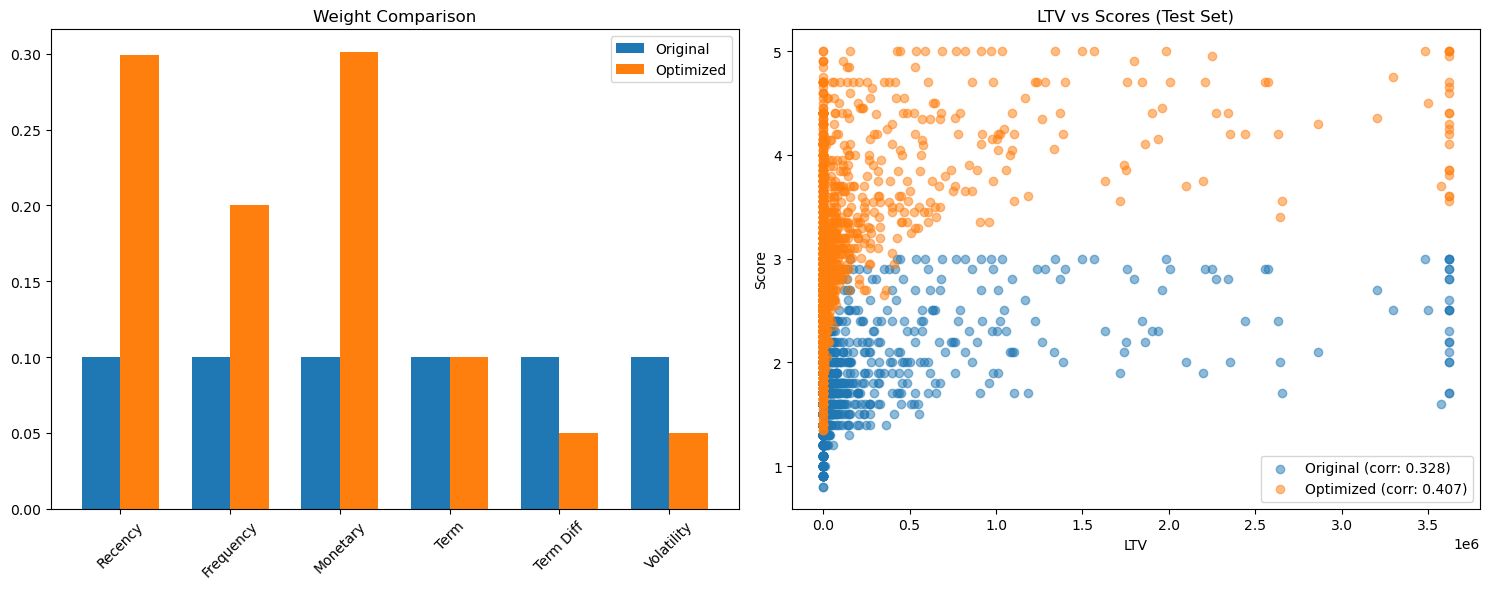

In [57]:
def objective_function(weights, df):
    """
    각 지표별 상대적 중요도를 고려하는 목적함수
    """
    total_score = calculate_weighted_score(df, weights)
    adjusted_ltv = calculate_adjusted_ltv(df)
    
    # 스코어와 LTV를 정규화
    total_score_norm = (total_score - total_score.mean()) / total_score.std()
    ltv_norm = (adjusted_ltv - adjusted_ltv.mean()) / adjusted_ltv.std()
    
    # 상관관계 계산
    correlation = np.corrcoef(total_score_norm, ltv_norm)[0,1]
    
    # 각 가중치별 중요도 보너스
    importance_factors = [0.2, 0.3, 0.2, 0.15, 0.1, 0.05]  # R, F, M, Term, Term_diff, Vol
    weight_bonus = sum(w * f for w, f in zip(weights, importance_factors))
    
    # 가중치 분산에 대한 페널티 (너무 극단적인 가중치 방지)
    weight_variance_penalty = np.var(weights) * 0.1
    
    return -(correlation + weight_bonus - weight_variance_penalty)

def optimize_multiple_starts(df, n_starts=10):
    """
    각 지표별 최소 가중치를 보장하는 최적화
    """
    best_result = None
    best_score = float('-inf')
    
    # 각 지표별 최소 가중치 설정
    min_weights = {
        'R': 0.15,      # Recency
        'F': 0.20,      # Frequency
        'M': 0.15,      # Monetary
        'Term': 0.10,   # 거래기간
        'Term_diff': 0.05,  # 거래간격
        'Vol': 0.05     # 변동성
    }
    
    for i in range(n_starts):
        # 초기 가중치 설정
        initial_weights = np.random.dirichlet(np.array([3, 4, 3, 2, 1, 1]))
        
        # 각 가중치별 최소값 제약조건 생성
        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]  # 합이 1
        for idx, min_weight in enumerate(min_weights.values()):
            constraints.append({
                'type': 'ineq',
                'fun': lambda x, i=idx, min_w=min_weight: x[i] - min_w
            })
        
        result = minimize(objective_function, 
                        initial_weights,
                        args=(df,),
                        constraints=constraints,
                        bounds=[(0, 1) for _ in range(6)],
                        method='SLSQP',
                        options={'maxiter': 1000, 'ftol': 1e-8})
        
        if -result.fun > best_score:
            best_score = -result.fun
            best_result = result
    
    return best_result

def run_optimization(df_processed):
    """
    전체 최적화 프로세스 실행
    """
    # Train/Test 분할
    X_train, X_test = train_test_split(df_processed, test_size=0.2, random_state=42)
    
    # 초기 가중치 설정
    initial_weights = {
        'R': 0.10,      # Recency
        'F': 0.10,      # Frequency
        'M': 0.10,      # Monetary
        'Term': 0.10,   # 거래기간
        'Term_diff': 0.10,  # 거래간격
        'Vol': 0.10     # 변동성
    }
    
    # 최적화 실행
    best_result = optimize_multiple_starts(X_train)
    
    # 결과 분석
    results = analyze_results(list(initial_weights.values()), best_result.x, X_train, X_test)
    validation_results = validate_optimization(list(initial_weights.values()), best_result.x, X_test)
    
    # 결과 출력
    print("\n=== 가중치 최적화 결과 ===")
    print("\n초기 가중치:")
    for k, v in initial_weights.items():
        print(f"{k}: {v:.3f}")
    
    print("\n최적화된 가중치:")
    optimized_weights = dict(zip(initial_weights.keys(), best_result.x))
    for k, v in optimized_weights.items():
        print(f"{k}: {v:.3f}")
    
    print("\nLTV와의 상관관계:")
    print(f"학습 데이터 - 초기: {results['train']['original_correlation']:.3f}, "
          f"최적화: {results['train']['optimized_correlation']:.3f}")
    print(f"테스트 데이터 - 초기: {results['test']['original_correlation']:.3f}, "
          f"최적화: {results['test']['optimized_correlation']:.3f}")
    
    return best_result, results, validation_results

# Preprocess your data
df_processed = preprocess_data(df)

# Run the optimization
best_result, results, validation_results = run_optimization(df_processed)